In [1]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from flyeye.data.experiments import Experiment
from figures.dynamics import Expression    
from figures.comparison import DosingComparison
%matplotlib inline

data_path = '../data/published'

# Load dosage experiment data

In [2]:
pnt1x = Experiment(join(data_path, 'pntgfp_dosing', '1xPntGFP'), normalization='ch2')
pnt2x = Experiment(join(data_path, 'pntgfp_dosing', '2xPntGFP'), normalization='ch2')

# add P/Y ratio to cell data
pnt1x.set_ratio('ch1_normalized', 'ch0_normalized')
pnt2x.set_ratio('ch1_normalized', 'ch0_normalized')

# Figure 4 A-D

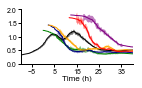

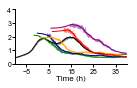

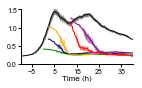

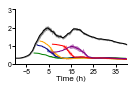

In [3]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 4A (Pnt levels, 1x PntGFP)
fig4A = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 2), yticks=np.arange(0, 2.1, .5))
fig4A.render('ch1_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4B (Pnt levels, 2x PntGFP)
fig4B = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 4), yticks=np.arange(0, 4.1, 1.))
fig4B.render('ch1_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4C (Yan levels, 1x PntGFP)
fig4C = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 1.5), yticks=np.arange(0, 1.6, .5))
fig4C.render('ch0_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 4D (Yan levels, 2x PntGFP)
fig4D = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(0, 3), yticks=np.arange(0, 3.1, 1.))
fig4D.render('ch0_normalized', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# new

TypeError: interval() got multiple values for keyword argument 'resolution'

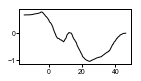

In [15]:
# define cell types
neurons = [['r8'],['r2','r5'],['r3','r4'],['r1','r6'],['r7']]

# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 4A (Pnt levels, 1x PntGFP)
fig4A = Expression(pnt1x)
ax_kw = dict(xlim=(-10, 40), ylim=(-1, 3), yticks=np.arange(-1, 3.1, .5))
fig4A.render('logratio', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)
fig4A.fig.axes[0].set_title('1x PntGFP')

# Fig 4B (Pnt levels, 2x PntGFP)
fig4B = Expression(pnt2x)
ax_kw = dict(xlim=(-10, 40), ylim=(-1, 3), yticks=np.arange(-1, 3.1, 0.5))
fig4B.render('logratio', neurons, interval=True, ax_kw=ax_kw, interval_kw=interval_kw)
fig4B.fig.axes[0].set_title('2x PntGFP')

for ax in (fig4A.fig.axes[0], fig4B.fig.axes[0]):
    ax.set_ylabel('P:Y Ratio')
    ax.set_ylim(-1.2, 3)
    ax.set_title('')
    ax.set_yticks([-1, 0, 1, 2, 3])
    ax.spines['left'].set_bounds(-1.2, 3)
    
#fig4A.fig.savefig('./graphics/ratio1x_dynamics.pdf', transparent=True, dpi=300, bbox_inches='tight')
#fig4B.fig.savefig('./graphics/ratio2x_dynamics.pdf', transparent=True, dpi=300, bbox_inches='tight')

# Figure 4 E

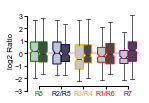

In [5]:
fig4E = DosingComparison.from_experiment(pnt1x, pnt2x)
fig4E.render(channel='logratio')

In [6]:
fig4E.get_statistics()

,log10 pval
R1/R6,-0.96
R2/R5,-0.31
R3/R4,-3.05
R7,-9.68
R8,-0.44


# Load yan clones data

In [7]:
from flyqma import Experiment
from flyqma.analysis.statistics import CelltypeComparison, PairwiseCelltypeComparison

# define measurement inclusion criteria
options = dict(selected_only=True, exclude_boundary=True)

# load control clone measurements
control_exp = Experiment(join(data_path, 'clones', 'bleedthrough_control'))
control = control_exp.aggregate_measurements(**options)

# load yan mutant clone measurements
perturbation_exp = Experiment(join(data_path, 'clones', 'yanE833'))
perturbation = perturbation_exp.aggregate_measurements(**options)

## Statistical comparison between clones

In [8]:
_ = CelltypeComparison(control, 'ch1c_normalized', label='genotype')
print('\n')
_ = CelltypeComparison(perturbation, 'ch1c_normalized', label='genotype')

Statistical test: MW
0 > 1: p = 0.2420
0 < 2: p = 0.0022
1 > 2: p = 0.3283


Statistical test: MW
0 < 1: p = 0.0000
0 < 2: p = 0.0000
1 > 2: p = 0.0000


In [11]:
control_comparison = PairwiseCelltypeComparison(control, 0, 1, basis='ch1c_normalized', label='genotype')
control_comparison.compare()

(0.2420210500791694, True)

In [12]:
perturbation_comparison = PairwiseCelltypeComparison(perturbation, 0, 1, basis='ch1c_normalized', label='genotype')
perturbation_comparison.compare()

(1.6320791382285735e-69, False)

# Figure 4 H

In [10]:
from flyqma.analysis.statistics import PairwiseCelltypeComparison
import matplotlib.pyplot as plt
import numpy as np

def clones_figure(data):
    
    # create figure/axes
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(3, 1.5))
    
    # plot clonal marker comparison
    prfp = PairwiseCelltypeComparison(data, 0, 1, 'ch2_normalized', 'genotype')
    prfp.plot(ax=ax0, ylabel='UbiRFP (a.u.)', cut=1)
    ax0.set_ylim(-0.1, 2.5)
    ax0.set_yticks(np.arange(0, 2.5+.1, .5))
    
    # plot PntGFP comparison
    pgfp = PairwiseCelltypeComparison(data, 0, 1, 'ch1c_normalized', 'genotype')
    pgfp.plot(ax=ax1, ylabel='PntGFP (a.u.)', cut=1)
    ax1.set_ylim(-0.1, 1.2)
    ax1.set_yticks(np.arange(0, 1.2+.1, .2))
    
    # enforce tight layout
    plt.tight_layout()
    
    return fig

%matplotlib inline

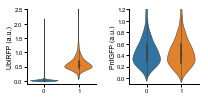

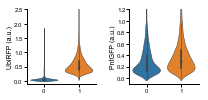

In [13]:
# compare bleedthrough control clones
control_fig = clones_figure(control)

# compare yan mutant clones
perturbation_fig = clones_figure(perturbation)